# MS/MS Analysis of Sulindac

In [101]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import venn

In [2]:
default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

### Initialize variables

In [16]:
parentDTXSID = 'DTXSID4023624'
parentSMILES = r'CC1=C(C2=C(C1=CC3=CC=C(C=C3)S(=O)C)C=CC(=C2)F)CC(=O)O'
parentINCHIKEY = Chem.MolToInchiKey(Chem.MolFromSmiles(parentSMILES))
root_dir = r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\Sulindac_CaseStudy'
MSMS_results = pd.read_csv(root_dir + r'\CFMID_Merged\MergedCFMIDResults.csv')

### Generate Identification DataFrame

In [17]:
identificationDF = pd.DataFrame(columns = ['Feature_Mass', 'Identifier', 'Identifier_Level', 'InChIKey' ,'Confidence', 'Formula_Score', 'MSMS_Score'])

### Predicted/Reported Metabolites list

In [18]:
aggregatedMetabolites = pd.read_csv(r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\metabolite_masterList.csv')

In [19]:
aggregatedMetabolites = aggregatedMetabolites[aggregatedMetabolites['Parent_DTXSID'] == parentDTXSID]
aggregatedMetabolites['INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in aggregatedMetabolites['SMILES']]
aggregatedMetabolites

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,INCHIKEY
553,DTXSID4023624,NaN,CC1=C(CC(=O)O)c2cc(F)ccc2C1(O)C(O)c1ccc(S(C)(=...,C20H19FO6S,406.088638,False,True,0,0,1,0,0,VUUGTVHZMWVFSK-UHFFFAOYSA-N
554,DTXSID4023624,NaN,CC1=C(CC(=O)O)c2cc(F)ccc2C12OC2c1ccc(S(C)(=O)=...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,CCJSSIWKUGOQMW-UHFFFAOYSA-N
555,DTXSID4023624,NaN,CC1=C(CC(=O)O)c2cc(F)ccc2C1=Cc1ccc(S(C)(=O)=O)cc1,C20H17FO4S,372.083158,False,True,0,1,1,1,0,MVGSNCBCUWPVDA-UHFFFAOYSA-N
556,DTXSID4023624,NaN,CC1=C(CC(=O)O)c2cc(F)ccc2C1(O)C(=O)c1ccc([S+](...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,SWTMTEJLFGITGV-UHFFFAOYSA-N
557,DTXSID4023624,NaN,CC1=C(CC(=O)O)c2cc(F)ccc2C1(O)C(O)c1ccc(S(C)=O...,C20H19FO5S,390.093723,False,True,0,0,1,1,0,LOUNOINICBBSMK-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,DTXSID4023624,DTXSID4023624,CC1=C(CC(O)=O)C2=C(C=CC(F)=C2)\C1=C/C1=CC=C(C=...,C20H17FO3S,356.088244,False,False,0,0,0,0,1,MLKXDPUZXIRXEP-MFOYZWKCSA-N
658,DTXSID4023624,DTXSID0049078,CSC1=CC=C(\C=C2\C(C)=C(CC(O)=O)C3=C2C=CC(F)=C3...,C20H17FO2S,340.093329,False,True,0,0,0,0,1,LFWHFZJPXXOYNR-MFOYZWKCSA-N
659,DTXSID4023624,DTXSID101025907,CC1=C(CC(=O)O[C@@H]2O[C@@H]([C@@H](O)[C@H](O)[...,C26H25FO9S,532.120332,False,False,0,0,0,0,1,ZGOXLKUBXKIPQX-AEHOTZTESA-N
660,DTXSID4023624,DTXSID501025909,CSC1=CC=C(\C=C2\C(C)=C(CC(=O)O[C@@H]3O[C@@H]([...,C26H25FO8S,516.125417,False,False,0,0,0,0,1,FWLAXSAVBCVJBU-UBTHQZBOSA-N


### CFMID Identifications

In [20]:
MSMS_results

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE
0,184.01684,DTXCID30940884,C4H10ClN2O2P,ClCCNP1(=O)NCCO1,184.0195,0.000143,0.000190
1,184.01942,DTXCID201428255,C8H8O3S,COC1=C(C=C(S)C=C1)C(O)=O,184.0195,0.148792,0.196802
2,184.01942,DTXCID90958001,C8H8O3S,CS(=O)C1=CC=CC=C1C(O)=O,184.0195,0.225632,0.298437
3,184.01942,DTXCID50272396,C8H8O3S,COC1=CC(C(O)=O)=C(S)C=C1,184.0195,0.166382,0.220068
4,184.01942,DTXCID30448512,C8H8O3S,COC1=C(S)C=C(C=C1)C(O)=O,184.0195,0.152078,0.201148
...,...,...,...,...,...,...,...
137,388.08030,DTXCID80509046,C20H20O4S2,C=C1CCC(CC1=C)(S(=O)(=O)C1=CC=CC=C1)S(=O)(=O)C...,388.0799,0.139717,0.428584
138,388.08030,DTXCID00398691,C20H20O4S2,CCCCC#CC=C(S(=O)(=O)C1=CC=CC=C1)S(=O)(=O)C1=CC...,388.0799,0.155692,0.477588
139,388.08030,DTXCID20509045,C20H20O4S2,C=CCCC(CC#C)(S(=O)(=O)C1=CC=CC=C1)S(=O)(=O)C1=...,388.0799,0.141962,0.435469
140,388.08030,DTXCID40134156,C20H20O4S2,O=C1OCCCCCCOC(=O)C2=CC=CC=C2SSC2=CC=CC=C12,388.0799,0.243324,0.746398


In [21]:
print('Num features in MSMS data: ' + str(len(MSMS_results['Feature_MASS'].unique())))

Num features in MSMS data: 4


## Match MSMS predictions against known/predicted metabolites

In [22]:
MSMS_results['InchiKey'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in MSMS_results['SMILES']]
MSMS_results.drop_duplicates(subset = 'InchiKey', inplace = True)
MSMS_results['Predicted'] = [True if x in aggregatedMetabolites['INCHIKEY'].values else False for x in MSMS_results['InchiKey']]

In [23]:
predictedSubset = MSMS_results[MSMS_results['Predicted'] == True]
predictedSubset

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE,InchiKey,Predicted


In [24]:
for idx, compound in predictedSubset.iterrows():
    rowDF = pd.DataFrame(data = {'Feature_Mass' : compound['Feature_MASS'],
                                 'Identifier': compound['SMILES'],
                                 'Identifier_Level' : 'Structure - MS2',
                                 'InChIKey' : Chem.MolToInchiKey(Chem.MolFromSmiles(compound['SMILES'])),
                                 'Confidence' : '2b',
                                 'Formula_Score' : None,
                                 'MSMS_Score' : compound['quotient_SCORE']}, index=[idx])
    identificationDF = identificationDF.append(rowDF)

In [25]:
identificationDF

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score


In [26]:
mols = []
for featureMass in predictedSubset['Feature_MASS'].unique():
    rows = predictedSubset[predictedSubset['Feature_MASS'] == featureMass]
    mols = mols + [Chem.MolFromSmiles(x) for x in rows['SMILES']]
if len(mols) > 0:
    img = Draw.MolsToGridImage(mols, molsPerRow=len(mols), subImgSize=(200,200))
    display(img)

In [27]:
for chem in predictedSubset['SMILES']:
    Draw.MolToFile(Chem.MolFromSmiles(chem), root_dir + '\Figures\MOLImage' +chem+ '.png')

## Find structures missed by CFMID but matched between predictions/reported and MS labeling

In [28]:
featureList = pd.read_csv(root_dir + '\Filtered_features\FeatureList_subset.csv')
featureList['Formula'] = featureList['Formula'].apply(lambda x: x.rsplit('Esi')[0] if 'Esi' in x else x.rsplit('_mfg')[0] if '_mfg' in x else x)
featureList = featureList[~featureList['Mass'].isin(identificationDF['Feature_Mass'])]

In [29]:
featureList

,index,Feature_ID,Formula,Score,Mass,Retention_Time,BlankG00,BlankG01,BlankG02,Gluc00,...,Super42,BlankSub_Median_Super4,BlankSub_Max_Median_ALLSamples_Super4,Has_Adduct_or_Loss,Is_Adduct_or_Loss,Adduct_or_Loss_Info,Annotation_Source,Formula_Clean,KMeans,orderCat
0,162,269,C20H17FO5S,91.93,388.0799,5.898999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,Suspect,C20H17FO5S,2,1
1,2,714,C14H33N6,85.62,285.2726,10.684999,NaN,NaN,NaN,280702.0,...,327793.0,270952.0,270952.0,0,0,NaN,MFG,C14H33N6,2,3
2,8,729,C17H39N6,75.84,327.3197,10.885993,NaN,NaN,NaN,518961.0,...,979653.0,808571.0,808571.0,0,0,NaN,MFG,C17H39N6,2,3
3,51,726,C19H39NO2,82.59,313.3098,11.085000,NaN,NaN,NaN,NaN,...,218556.0,218556.0,218556.0,0,0,NaN,MFG,C19H39NO2,2,3
4,183,83,C8H8O3S,98.40,184.0195,3.106001,NaN,NaN,NaN,NaN,...,162179.0,162179.0,162179.0,0,0,NaN,MFG,C8H8O3S,2,3


In [30]:
allSus = pd.read_csv('L:\\Lab\\NCCT_ExpoCast\\ExpoCast2020\\SSA-Metabolism\\CaseStudy\\metabolite_masterList.csv')
allSus = allSus.fillna('None')
allSus = allSus[allSus['Parent_DTXSID'] == parentDTXSID]
allSus['Metabolite_INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in allSus['SMILES']]

In [31]:
allSus

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
553,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)ccc2C1(O)C(O)c1ccc(S(C)(=...,C20H19FO6S,406.088638,False,True,0,0,1,0,0,VUUGTVHZMWVFSK-UHFFFAOYSA-N
554,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)ccc2C12OC2c1ccc(S(C)(=O)=...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,CCJSSIWKUGOQMW-UHFFFAOYSA-N
555,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)ccc2C1=Cc1ccc(S(C)(=O)=O)cc1,C20H17FO4S,372.083158,False,True,0,1,1,1,0,MVGSNCBCUWPVDA-UHFFFAOYSA-N
556,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)ccc2C1(O)C(=O)c1ccc([S+](...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,SWTMTEJLFGITGV-UHFFFAOYSA-N
557,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)ccc2C1(O)C(O)c1ccc(S(C)=O...,C20H19FO5S,390.093723,False,True,0,0,1,1,0,LOUNOINICBBSMK-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,DTXSID4023624,DTXSID4023624,CC1=C(CC(O)=O)C2=C(C=CC(F)=C2)\C1=C/C1=CC=C(C=...,C20H17FO3S,356.088244,False,False,0,0,0,0,1,MLKXDPUZXIRXEP-MFOYZWKCSA-N
658,DTXSID4023624,DTXSID0049078,CSC1=CC=C(\C=C2\C(C)=C(CC(O)=O)C3=C2C=CC(F)=C3...,C20H17FO2S,340.093329,False,True,0,0,0,0,1,LFWHFZJPXXOYNR-MFOYZWKCSA-N
659,DTXSID4023624,DTXSID101025907,CC1=C(CC(=O)O[C@@H]2O[C@@H]([C@@H](O)[C@H](O)[...,C26H25FO9S,532.120332,False,False,0,0,0,0,1,ZGOXLKUBXKIPQX-AEHOTZTESA-N
660,DTXSID4023624,DTXSID501025909,CSC1=CC=C(\C=C2\C(C)=C(CC(=O)O[C@@H]3O[C@@H]([...,C26H25FO8S,516.125417,False,False,0,0,0,0,1,FWLAXSAVBCVJBU-UBTHQZBOSA-N


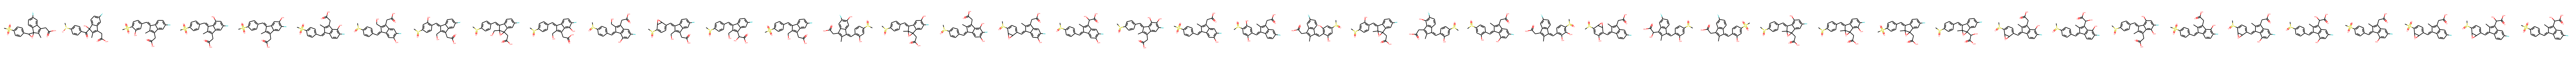

In [32]:
mols = []
for idx, rows in allSus[allSus['Formula'] == 'C20H17FO5S'].iterrows():
    try:
        mols = mols + [Chem.MolFromSmiles(rows['SMILES'])]
    except:
        continue
if len(mols) > 0:
    img = Draw.MolsToGridImage(mols, molsPerRow=len(mols), subImgSize=(200,200))
    display(img)

In [33]:
for idx, compound in featureList.iterrows():
    formulaFilter = allSus['Formula'].str.contains(compound['Formula'])
    if sum(formulaFilter) > 1:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': compound['Formula'],
                                 'Identifier_Level' : 'Formula - MS1 (Num Isomers:' + str(sum(allSus['Formula'] == compound['Formula']))+ r')',
                                 'InChIKey' : None,
                                 'Confidence' : '3',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        identificationDF = identificationDF.append(tmpDF)
    elif sum(formulaFilter) == 1:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': allSus.loc[formulaFilter, 'SMILES'].values[0],
                                 'Identifier_Level' : 'Structure - MS1',
                                 'InChIKey' : allSus.loc[formulaFilter, 'Metabolite_INCHIKEY'].values[0],
                                 'Confidence' : '3',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        identificationDF = identificationDF.append(tmpDF)
    elif sum(formulaFilter) == 0:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': compound['Formula'],
                                 'Identifier_Level' : 'Formula',
                                 'InChIKey' :  None,
                                 'Confidence' : '4',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        
        identificationDF = identificationDF.append(tmpDF)

In [34]:
identificationDF.sort_values(by = 'Confidence')

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score
0,388.0799,C20H17FO5S,Formula - MS1 (Num Isomers:44),None,3,91.93,None
1,285.2726,C14H33N6,Formula,None,4,85.62,None
2,327.3197,C17H39N6,Formula,None,4,75.84,None
3,313.3098,C19H39NO2,Formula,None,4,82.59,None
4,184.0195,C8H8O3S,Formula,None,4,98.40,None


In [37]:
matchedDF = allSus[(allSus['Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) | (allSus['Reported'] == 1)]
matchedDF

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
585,DTXSID4023624,DTXSID6040246,[H]C(C1=CC=C(S(C)(=O)=O)C=C1)=C1C(C)=C(CC(=O)O...,C20H17FO4S,372.083158,False,True,1,0,0,0,1,MVGSNCBCUWPVDA-UHFFFAOYSA-N
657,DTXSID4023624,DTXSID4023624,CC1=C(CC(O)=O)C2=C(C=CC(F)=C2)\C1=C/C1=CC=C(C=...,C20H17FO3S,356.088244,False,False,0,0,0,0,1,MLKXDPUZXIRXEP-MFOYZWKCSA-N
658,DTXSID4023624,DTXSID0049078,CSC1=CC=C(\C=C2\C(C)=C(CC(O)=O)C3=C2C=CC(F)=C3...,C20H17FO2S,340.093329,False,True,0,0,0,0,1,LFWHFZJPXXOYNR-MFOYZWKCSA-N
659,DTXSID4023624,DTXSID101025907,CC1=C(CC(=O)O[C@@H]2O[C@@H]([C@@H](O)[C@H](O)[...,C26H25FO9S,532.120332,False,False,0,0,0,0,1,ZGOXLKUBXKIPQX-AEHOTZTESA-N
660,DTXSID4023624,DTXSID501025909,CSC1=CC=C(\C=C2\C(C)=C(CC(=O)O[C@@H]3O[C@@H]([...,C26H25FO8S,516.125417,False,False,0,0,0,0,1,FWLAXSAVBCVJBU-UBTHQZBOSA-N
661,DTXSID4023624,DTXSID801025910,CC1=C(CC(=O)O[C@@H]2O[C@@H]([C@@H](O)[C@H](O)[...,C26H25FO10S,548.115246,False,False,0,0,0,0,1,POIVPBPDRVZPSG-UBTHQZBOSA-N


In [61]:
matchedFormula = allSus[allSus['Formula'] == 'C20H17FO5S']
matchedFormula

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
554,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)ccc2C12OC2c1ccc(S(C)(=O)=...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,CCJSSIWKUGOQMW-UHFFFAOYSA-N
556,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)ccc2C1(O)C(=O)c1ccc([S+](...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,SWTMTEJLFGITGV-UHFFFAOYSA-N
561,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)ccc2C1=Cc1ccc(S(C)(=O)=O)...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,FSXXRDBUEUIPAY-UHFFFAOYSA-N
562,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)cc(O)c2C1=Cc1ccc(S(C)(=O)...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,NVTPZBFCYGCQDZ-UHFFFAOYSA-N
563,DTXSID4023624,None,CC1=C(CC(=O)O)c2cc(F)c(O)cc2C1=Cc1ccc(S(C)(=O)...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,YJCIZKURVAAWOK-UHFFFAOYSA-N
564,DTXSID4023624,None,CC1=C(CC(=O)O)c2c(ccc(F)c2O)C1=Cc1ccc(S(C)(=O)...,C20H17FO5S,388.078073,False,True,0,0,1,0,0,TWUHLNDNFZMUQD-UHFFFAOYSA-N
586,DTXSID4023624,None,[H]C(C1=CC=C(S(C)=O)C=C1)=C1C2=CC(O)=C(F)C=C2C...,C20H17FO5S,388.078073,False,False,1,0,0,0,0,ZDNQXDPZKQYMLO-UHFFFAOYSA-N
587,DTXSID4023624,None,[H]C(C1=C(O)C=C(S(C)=O)C=C1)=C1C2=C(C=C(F)C=C2...,C20H17FO5S,388.078073,False,False,1,0,0,0,0,PCJODXKFOBAMLT-UHFFFAOYSA-N
588,DTXSID4023624,None,[H]C(C1=CC=C(S(C)=O)C=C1)=C1C2=C(C=C(F)C=C2)C2...,C20H17FO5S,388.078073,False,False,1,0,0,0,0,ZSSQJPJOENKFPO-UHFFFAOYSA-N
589,DTXSID4023624,None,[H]C(C1=CC=C(S(C)=O)C=C1)=C1C2=C(C(O)=C(F)C=C2...,C20H17FO5S,388.078073,False,False,1,0,0,0,0,XKMUDLINRLCIHO-UHFFFAOYSA-N


In [38]:
modelList = ['ToolBox', 'Meteor', 'BioTransformer', 'TIMES', 'Reported']

aggGroup = allSus[allSus['Parent_DTXSID'].isin(['DTXSID4034150'])]
performanceMap = pd.DataFrame(data = None, columns=['Model','Total','Unique','NTA_Match_Count'])
performanceMap['Model'] = modelList
performanceMap['Total'] = list(allSus[modelList].sum(axis=0))
performanceMap['Unique'] = [sum((allSus[match] == 1.0) & (allSus[modelList].sum(axis = 1) == 1)) for match in modelList]
performanceMap['NTA_Match_Count'] = [sum(allSus.loc[allSus[match] == 1,'Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) for match in modelList]


In [39]:
performanceMap

,Model,Total,Unique,NTA_Match_Count
0,ToolBox,20,14,0
1,Meteor,8,2,0
2,BioTransformer,50,49,0
3,TIMES,5,0,0
4,Reported,6,5,0


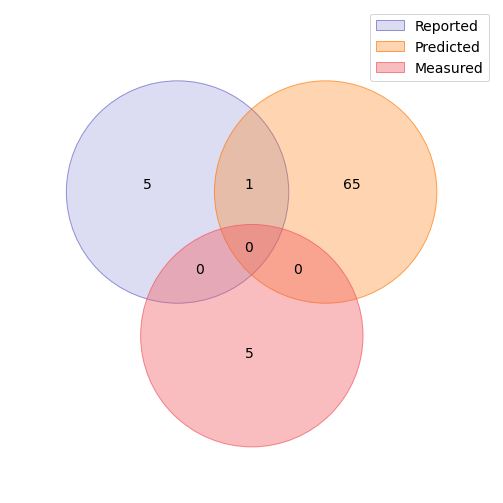

In [102]:
bt_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['BioTransformer'] > 0])
meteor_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Meteor'] > 0])
times_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['TIMES'] > 0])
tb_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['ToolBox'] > 0])

silico_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if (row['ToolBox'] > 0 or row['BioTransformer'] > 0 or row['Meteor'] > 0 or row['TIMES'] > 0)])
lit_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Reported'] > 0])
vitro_venn = set([row['InChIKey'] if row['Identifier_Level'] != 'Formula' else row['Identifier'] for idx, row in identificationDF.iterrows() if row['InChIKey'] != parentINCHIKEY]) 

labels = venn.get_labels([lit_venn, silico_venn, vitro_venn])
fig, ax = venn.venn4(labels, names=['Reported', 'Predicted', 'Measured'], colors = [default_colors[-1], default_colors[-2],default_colors[-3]])

In [103]:
labels

{'001': '5 ',
 '010': '65 ',
 '011': '0 ',
 '100': '5 ',
 '101': '0 ',
 '110': '1 ',
 '111': '0 '}

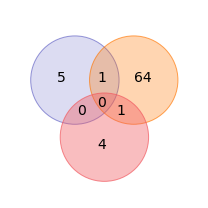

In [104]:
#Manual correction for isomers representing a single structure in Predicted and Measured
labels['001'] = '4 '
labels['010'] = '64 '
labels['011'] = '1 '
fig, ax = venn.venn4(labels, names=['Reported', 'Predicted', 'Measured'], colors = [default_colors[-1], default_colors[-2],default_colors[-3]], figsize = (3,3))
comp = 'Sulindac'
ax.get_legend().remove()
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_GenOverlap.tiff', dpi = 300)

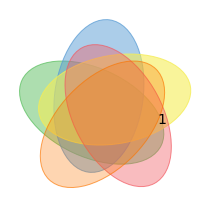

In [105]:
#Find overlapping metabolites 
bt_union = bt_venn.intersection(vitro_venn)
meteor_union = meteor_venn.intersection(vitro_venn)
times_union = times_venn.intersection(vitro_venn)
tb_union = tb_venn.intersection(vitro_venn)
lit_union = lit_venn.intersection(vitro_venn)

labels = {
    '10000':'',
    '01000':'',
    '00100':'',
    '00010':'',
    '00001':'',
    '11000':'',
    '01100':'',
    '00110': '1 ',
    '00011':'',
    '10100':'',
    '01010':'',
    '00101':'',
    '10010':'',
    '01001':'',
    '10001':'',
    '11100':'',
    '01110':'',   
    '00111':'',  
    '11010':'',
    '11001':'',  
    '10110':'',
    '10011':'',
    '01101':'',
    '01011':'',
    '10101':'',
    '01111':'',
    '10111':'',
    '11011':'',
    '11101':'',
    '11110':'',
    '11111':''
}

fig, ax = venn.venn5(labels, names=['BioTransformer', 'Meteor', 'TIMES', 'Toolbox', 'Reported'], figsize = (3,3))
ax.get_legend().remove()
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_SilicoOverlap.tiff', dpi = 300)